# Titik Akar Karakteristik Kalang Tertutup Target
$$
(\sigma,jw_d)=(-1.41,j)
$$

$$
G(s)=\frac {1}{s(s+1.41)(s+2.82)}
$$

In [1]:
import matplotlib.pyplot as plt
from control.matlab import *
%matplotlib qt
from sympy.physics.mechanics import dynamicsymbols, SymbolicSystem
from sympy import *
import numpy as np

In [2]:
sigma=-1.41
jwd=complex(0,1)
target=sigma+jwd

In [3]:
target

(-1.41+1j)

In [4]:
s = symbols ('s')#import symbol s

In [5]:
G = 1/(s*(s+1.41)*(s+2.82)) #fungsi transfer open loop
polyG =G.as_poly() #Penyederhanaan persamaan
polyG

Poly((1/(s**3 + 4.23*s**2 + 3.9762*s)), 1/(s**3 + 4.23*s**2 + 3.9762*s), domain='ZZ')

In [6]:
G=tf([1],[1,4.23,3.9762,0])

In [7]:
G


            1
------------------------
s^3 + 4.23 s^2 + 3.976 s

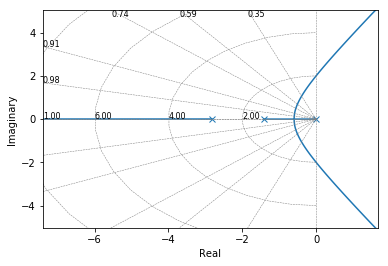

In [8]:
R,K=rlocus(G,plot=True)

Terlihat Root Locus tidak melewati titik target akar karakteristik sistem, maka akan dilakukan desain lead compensator karena dibutuhkan akar yang lebih kiri daripada kondisi root locus sekarang (Target adalah poles yang berwarna merah).

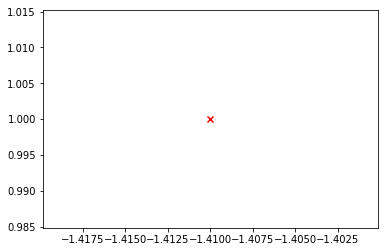

In [9]:
plt.scatter(target.real,target.imag,marker='x',c='r')

Terlihat sudut dari target adalah jumlahan dari seluruh sudut poles terhadap target (Target adalah poles yang berwarna merah). Yaitu 
$$
\theta=-(arctan(1.41/1)+90)-(90)-(arctan(1/1.41))
$$
$$
\theta=-180-(arctan(1.41/1))-(arctan(1/1.41)
$$
$$
\theta=-270
$$

In [10]:
-180-np.arctan(1.41)*180/np.pi-np.arctan(1/1.41)*180/np.pi

-270.0

Terlihat kebutuhan -90 agar dapat kembali ke kelipatan
$$
-180(2k+1), k=0,1,2,3,...
$$
Sesuai dengan syarat sudut. Maka sudut target terhadap zero-poles yaitu $ \phi $
$$
\phi=90
$$

# Lead Compensator Sederhana, Tanpa Poles
Perhatikan untuk metode sederhana, untuk zeros tepat dibawah target, langsung didapatkan perubahan sudut 90 derajat sehingga tidak dibutuhkan poles lain. Didapatkan hasil sebagai berikut untuk $ G_c $ atau kompensator:
$$
G_c=s+1.41
$$
Sehingga hasil sistem adalah
$$
G_cG=\frac{K(s+1.41)}{s(s+1.41)(s+2.82)}
$$

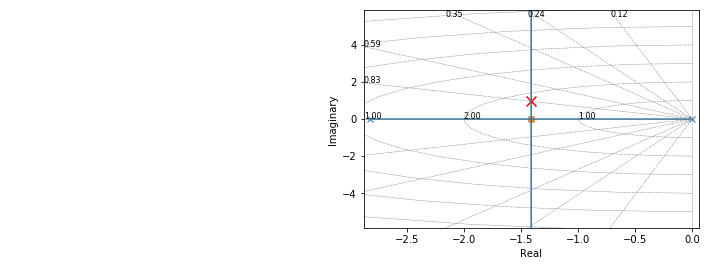

In [11]:
G_sys = (s+1.41)/(s*(s+1.41)*(s+2.82)) #fungsi transfer open loop
polyG =G_sys.as_poly() #Penyederhanaan persamaan
polyG
Gsys=tf([1,1.41],[1,4.23,3.9762,0])
rlocus(Gsys,plot=True)
plt.scatter(target.real,target.imag,marker='x',c='r',s=100)

<img src="./Geometri.png" width="40%">

Maka digunakan metode sederhana dengan geometri. Didapatkan bahwa sudut APO adalah 
$$
APO_\theta=180-(arctan(1.41/1))
$$
$$
APO_\theta=125.345
$$
Maka sudut APB dan BPO adalah 62.6725 derajat
Sehingga jika ditarik garis dari PB sebesar $ \frac{\phi}{2} $ yaitu sebesar 45 derajat. Sudut APD adalah 107.6725 derajat dan APC adalah 17.6725 derajat. Didapatkan garis PD dan PC dengan masing masing gradien $ m_{pd} = -3.1386121600868147 $ dan $ m_{pc} = 0.31861216008681364 $


In [12]:
APO=180-np.arctan(1.41)*180/np.pi
print(APO)
print(APO/2)

125.34502290434381
62.672511452171904


In [13]:
APD=(APO/2 + 45)
APD

107.6725114521719

In [14]:
m_pd=np.tan(APD*np.pi/180)
m_pd

-3.1386121600868147

In [15]:
APC=(APO/2 - 45)
APC

17.672511452171904

In [16]:
m_pc=np.tan(APC*np.pi/180)
m_pc

0.31861216008681364

Berdasarkan kalkulasi tersebut dapat dibentuk persamaan garis untuk mencari nilai poles dan zero yang berkaitan dengan sumbu y sebagai sumbu imajiner dan sumbu x sebagai sumbu real. Untuk zeros:
$$
y1=−3.1386121600868147x1+c1
$$
Untuk poles:
$$
y2=0.31861216008681364x2+c2
$$
dapat diselesaikan dengan mengambil titik -1.41+1j sebagai titik potong dimana y=1 dan x=-1.41 sehingga didapat
c1=-3.425443145722409 dan c2=1.449243145722407 sehingga Untuk zeros:
$$
y1=−3.1386121600868147x1-3.425443145722409
$$
Untuk poles:
$$
y2=0.31861216008681364x2+1.449243145722407
$$

In [17]:
c1=1-(-3.1386121600868147*-1.41)
c1

-3.425443145722409

In [18]:
c2=1-(0.31861216008681364*-1.41)
c2

1.449243145722407

Diselesaikan untuk y=0 untuk kedua persamaan, untuk kompensator didapat zero=-0.37294054015845385 dan pole=-5.267059459841547

In [19]:
zero_compensator=3.425443145722409/(-3.1386121600868147)
zero_compensator

-1.0913878399131864

In [20]:
pole_compensator=-1.449243145722407/0.31861216008681364
pole_compensator

-4.5486121600868135

Maka didapat persamaan $G_c$ untuk kompensator adalah
$$
G_c=Kc\frac{s+1.0914}{s+4.5486}
$$

Sehingga persamaan total gain sistem kalang tertutup adalah
$$
G_cG=\frac{K(𝑠+1.0914)}{s(s+1.41)(s+2.82)(𝑠+4.5486)}
$$

Untuk mencari nilai K, digunakan syarat magnituda dimana 
$$
|G_{sys}|=|G_cG|=1
$$
Sehingga didapat K=9.441

In [21]:
G_sys = (s+1.0914)/(s*(s+1.41)*(s+2.82)*(s+4.5486)) #fungsi transfer open loop
polyG =G_sys.as_poly() #Penyederhanaan persamaan
polyG

Poly(1.0*s*(1/(s**4 + 8.7786*s**3 + 23.216778*s**2 + 18.08614332*s)) + 1.0914*(1/(s**4 + 8.7786*s**3 + 23.216778*s**2 + 18.08614332*s)), s, 1/(s**4 + 8.7786*s**3 + 23.216778*s**2 + 18.08614332*s), domain='RR')

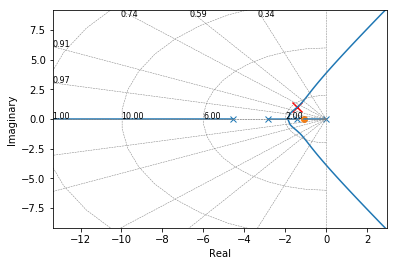

In [22]:
Gsys=tf([1,1.0914],[1,8.7786,23.216778,18.08614332,0])
rlocus(Gsys,plot=True)
plt.scatter(target.real,target.imag,marker='x',c='r',s=100)

Terlihat bahwa titik target akar sudah terdapat dalam sistem setelah diberi kompensator, Perhatikan bahwa poles baru dari kompensator tidak lebih dominan daripada poles plant awal.

In [23]:
from sympy import re, im, E, I
K=(-1.41+I)*(1/4.5486 * (-1.41+I)+1)*(1/1.41 * (-1.41+I)+1)*(1/2.82 * (-1.41+I)+1)*(-1.41+I+0.00556)/((-1.41+I+0.05)*(1/1.0914 * (-1.41+I)+1))
polyK=K.as_poly()
polyK

Poly(-0.00883296663867684*I - 0.577943653474697, I, domain='RR')

In [24]:
abs(-0.00883296663867684j-0.577943653474697)

0.5780111485873959

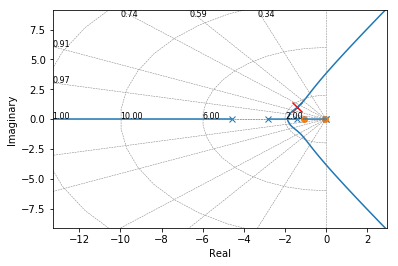

In [25]:
Gclag=tf([9.441,1.0914*9.441],[1,4.5486])
Gclead=tf([1.01457,0.05*1.01457],[1,0.00556])
G=tf([1],[1,4.23,3.9762,0])
Gsys=Gclag*Gclead*G
rlocus(Gsys,plot=True)
plt.scatter(target.real,target.imag,marker='x',c='r',s=100)

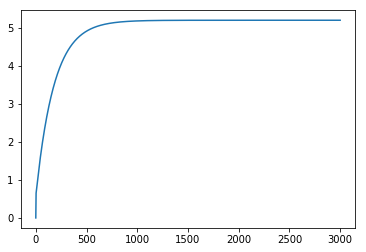

In [26]:
t=np.linspace(0,3000,1000)
y,time=impulse(Gsys,T=t)
plt.plot(time,y)

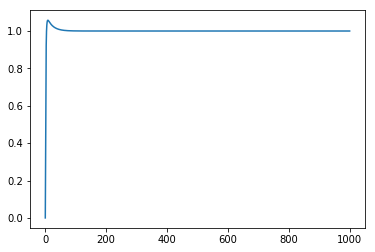

In [27]:
t=np.linspace(0,1000,1000)
closedloopsys=Gsys/(1+Gsys)
y,time=step(closedloopsys,T=t)
plt.plot(time,y)